In [1]:
#Data cleaning and pre-processing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/content/Algerian_forest_fires_cleaned.csv")

# Converting 'Classes' to binary
data['Classes'] = data['Classes'].apply(lambda val: 1 if val == 'fire' else 0)

# Define features and target
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
X = data[features]
y = data['Classes']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


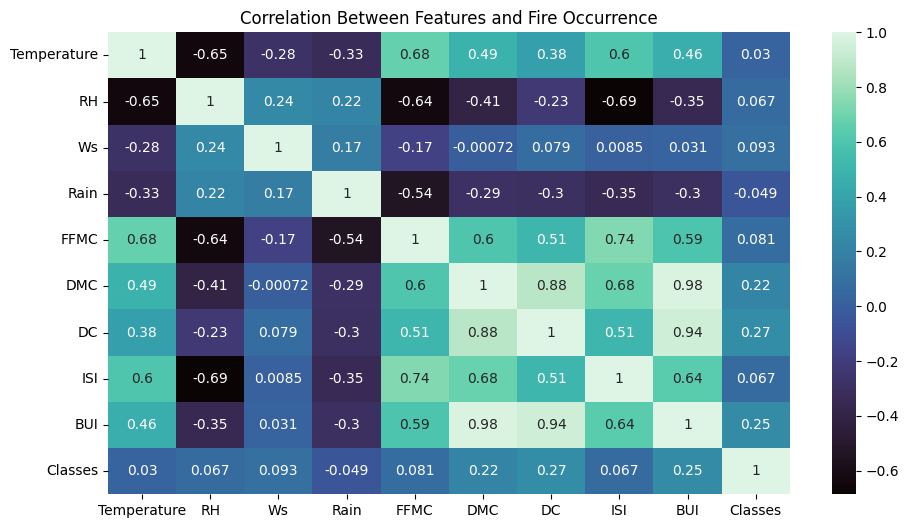

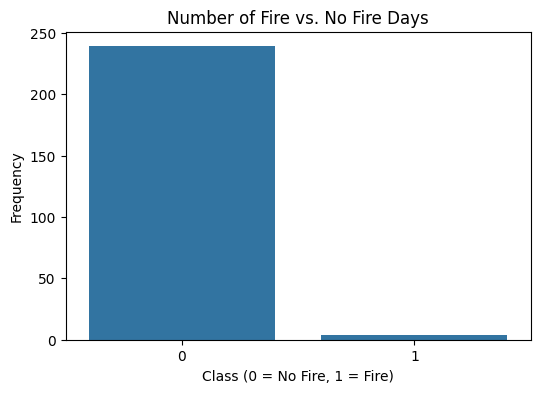

In [2]:
#Data visualizations and its obervations
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for correlations
plt.figure(figsize=(11, 6))
sns.heatmap(data[features + ['Classes']].corr(), annot=True, cmap='mako')
plt.title("Correlation Between Features and Fire Occurrence")
plt.show()

# Bar plot for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Classes', data=data)
plt.title("Number of Fire vs. No Fire Days")
plt.xlabel("Class (0 = No Fire, 1 = Fire)")
plt.ylabel("Frequency")
plt.show()


In [3]:
#Developing model and its analysis
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

# Initialize models with cross-validation for regularization
linear = LinearRegression()
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5)

# Fit the models
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


LassoCV(alphas=[0.01, 0.1, 1.0], cv=5)

In [4]:
#testing and model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate each model
models = {'Linear': linear, 'Ridge': ridge, 'Lasso': lasso}
results = {}

for name, model in models.items():
    predictions = model.predict(X_test)
    results[name] = {
        "MSE": mean_squared_error(y_test, predictions),
        "R²": r2_score(y_test, predictions)
    }

# Display results
for model_name, scores in results.items():
    print(f"{model_name} Regression:")
    print(f"  Mean Squared Error: {scores['MSE']:.4f}")
    print(f"  R² Score: {scores['R²']:.4f}\n")


Linear Regression:
  Mean Squared Error: 0.0311
  R² Score: -0.5572

Ridge Regression:
  Mean Squared Error: 0.0246
  R² Score: -0.2324

Lasso Regression:
  Mean Squared Error: 0.0204
  R² Score: -0.0215

